In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Підвищимо розмір графіків за замовчуванням
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = 7, 5
# plt.rcParams['axes.grid'] = True


In [65]:
# read a range from excel file
df = pd.read_excel('er_experiments.xlsx', sheet_name='Sheet1', usecols='A:G')

# convert dataframe to numpy array
input_matrix = df.to_numpy()


In [66]:
# confusion matrix
# input_matrix = np.array([
#     [133, 12, 96, 253, 187, 169, 108],
#     [13, 0, 12, 31, 22, 20, 13],
#     [131, 9, 123, 259, 212, 166, 124],
#     [223, 18, 209, 450, 349, 324, 201],
#     [177, 10, 160, 281, 253, 229, 123],
#     [194, 12, 146, 287, 235, 220, 153],
#     [112, 11, 101, 211, 169, 115, 112]
# ])

# define emotion classes
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

MODEL_NAME = 'Модель_1'

In [67]:
# calculate accuracy
accuracy = np.trace(input_matrix) / np.sum(input_matrix)
print(f"Overall Accuracy: {accuracy}")

# flatten the matrix for sklearn metrics
y_true = np.repeat(np.arange(input_matrix.shape[0]), np.sum(input_matrix, axis=1))
y_pred = np.repeat(np.arange(input_matrix.shape[0]), np.sum(input_matrix, axis=0))

# calculate precision, recall and f1-score independently for each class
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f_score = f1_score(y_true, y_pred, average=None)

# create a dataframe from the metrics
df = pd.DataFrame({
    'Emotion': EMOTIONS,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f_score
})

# set the Emotion column as the index
df.set_index('Emotion', inplace=True)

# print the dataframe
print(df)

Overall Accuracy: 0.17679019225410977
          Precision    Recall  F1-Score
Emotion                                
angry      0.939216  1.000000  0.968655
disgust    0.644737  0.441441  0.524064
fear       1.000000  0.830078  0.907150
happy      0.919008  0.940248  0.929507
neutral    0.906618  1.000000  0.951022
sad        0.999185  0.983160  0.991108
surprise   1.000000  0.998797  0.999398


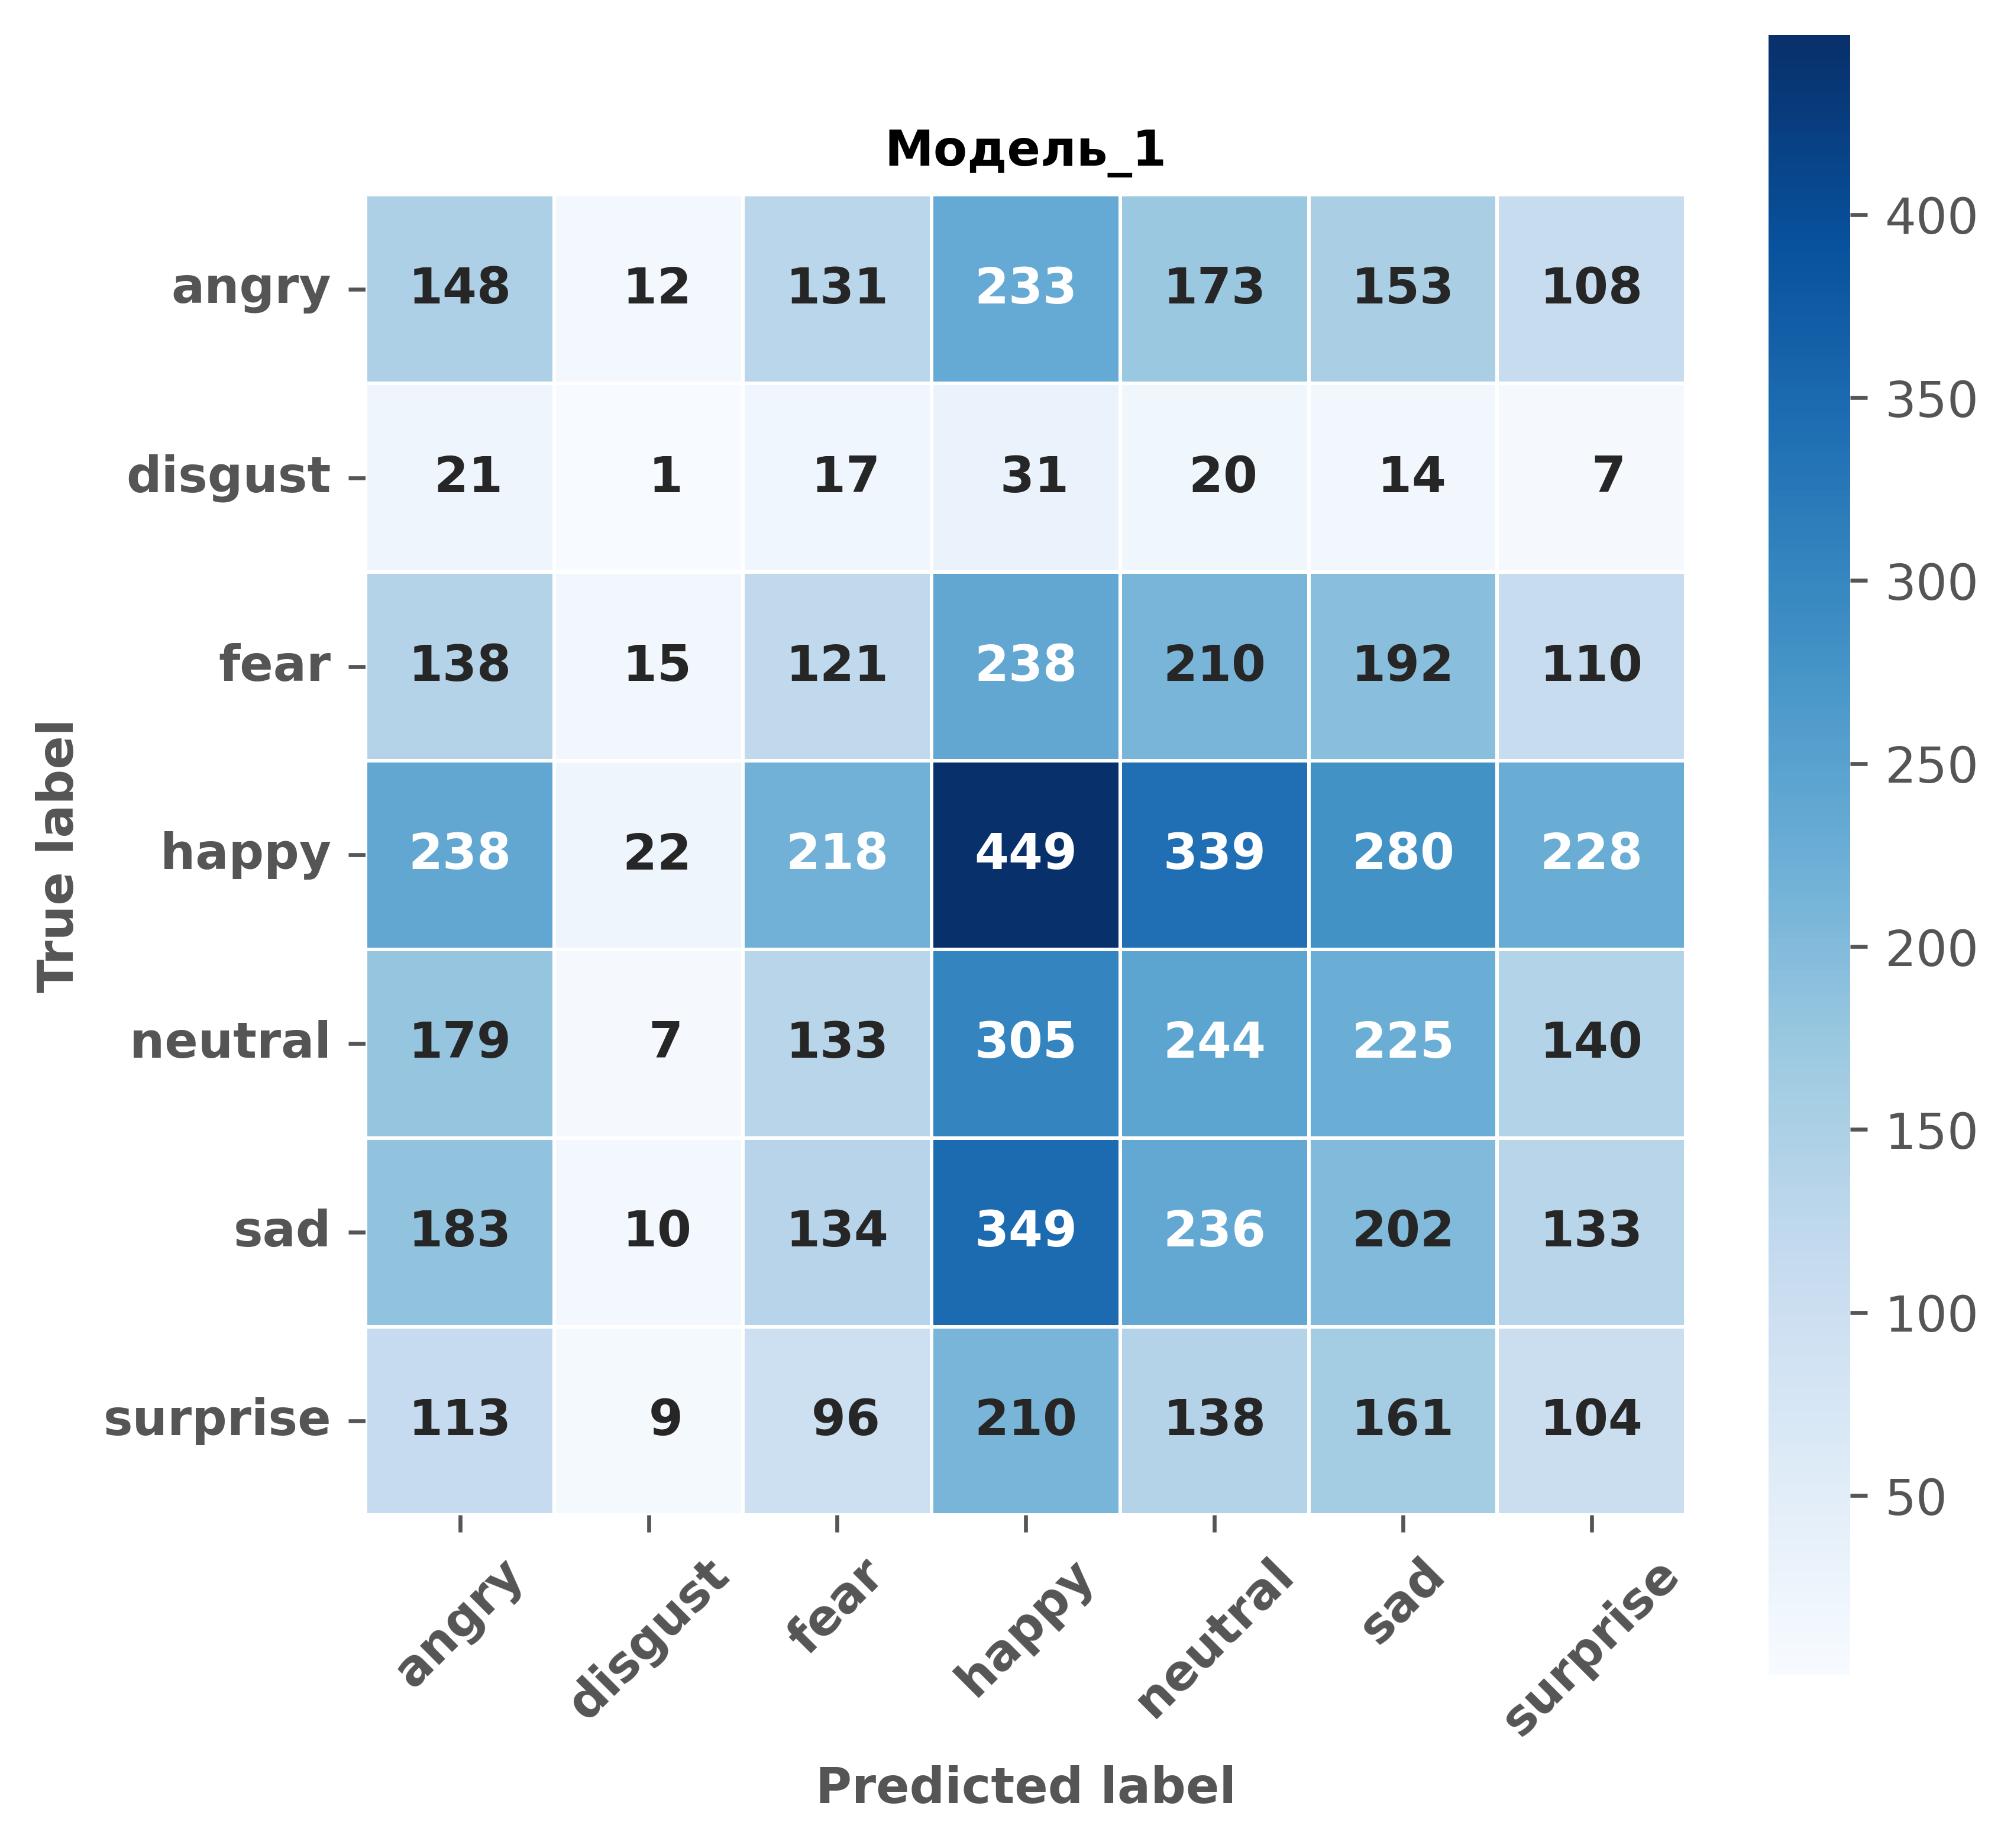

In [68]:
# array_7b = [[26484, 34, 2, 3, 57, 2, 0],
#             [59, 1200, 0, 2, 5, 0, 2],
#             [217, 2, 2613, 2, 30, 0, 0],
#             [18, 4, 0, 1882, 0, 0, 0],
#             [165, 5, 9, 0, 667, 0, 0],
#             [4, 3, 0, 0, 0, 4, 0],
#             [2, 3, 0, 0, 0, 0, 35]]


# df_cm = pd.DataFrame(array, index = [i for i in "NVRLA!E"],
#                   columns = [i for i in "NVRLA!E"])

plt.figure(figsize=(6, 6), dpi = 600)

sns.heatmap(input_matrix, cmap='Blues', annot=True, xticklabels=EMOTIONS,
            yticklabels=EMOTIONS, annot_kws={"size": 10, "weight": "bold"},
            fmt='3g', square=True, linewidths=0.5, cbar_kws={"shrink": 1.0})

#plt.tick_params(axis='x', labelsize=12) # x font label size
#plt.tick_params(axis='y', labelsize=12) # y font label size

plt.yticks(fontweight='bold', fontsize=10, rotation=0)
plt.xticks(fontweight='bold', fontsize=10, rotation=45)

plt.title(MODEL_NAME, fontweight='bold', fontsize=10)
plt.ylabel('True label', fontweight='bold', fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', fontsize=10)

# plt.savefig(f'{MODEL_NAME}.svg', bbox_inches='tight')
plt.show()